## 实验介绍

### 1.实验内容

本实验介绍K均值聚类算法。并通过实验来了解二分k-均值算法。

### 2.实验目标

通过本实验掌握kMeans聚类算法。

### 3.实验知识点

* 聚类

### 4.实验环境

* python 3.6.5  

### 5.预备知识

* 初等数学知识  
* Linux命令基本操作  
* Python编程基础

## 准备工作

点击屏幕右上方的下载实验数据模块，选择下载kmeans_place.tgz到指定目录下，然后再依次选择点击上方的File->Open->Upload,上传刚才下载的数据集压缩包，再使用如下命令解压：

In [1]:
!tar -zxvf kmeans_place.tgz

kmeans_place/
kmeans_place/places.txt
kmeans_place/Portland.png
kmeans_place/testSet.txt


##  【实验】对地图上的点进行聚类
本节，我们将实验《K均值聚类算法》的二分K-均值算法应用于一些真实的数据集上。

有一个文件，该文件存有70个位置的经纬度，如何能最省事的一次走完这70个地方。我们可以设计一个将这些地方进行聚类的最佳策略，这样就可以安排交通工具抵达这些簇的质心，然后步行到每个簇内地址。

最核心的问题还是对这些数据进行聚类分组。

由于我们的数据是这些位置的经纬度，所有我们计算数据点与簇质心的距离时需要使用球面余弦定理来计算。

而代码的实现中，除了我们需要添加一个距离计算函数，其余的都可以重用上节代码。

这里我们新建了一个clusterClubs函数，用来将数据读取，聚类算法和可视化集成到该函数中。

添加如下代码：

划分数据的误差, 未划分数据的误差:  3073.8303715312386 0.0
最佳划分簇为:  0
最佳簇的长度为:  69
划分数据的误差, 未划分数据的误差:  1043.637077660357 1685.0305259845018
划分数据的误差, 未划分数据的误差:  904.1450176223287 1388.799845546737
最佳划分簇为:  1
最佳簇的长度为:  32
划分数据的误差, 未划分数据的误差:  1058.6805157247813 904.1450176223287
划分数据的误差, 未划分数据的误差:  177.32316120205522 2000.9503279693156
划分数据的误差, 未划分数据的误差:  231.39107389829584 1680.7943807464874
最佳划分簇为:  2
最佳簇的长度为:  20
划分数据的误差, 未划分数据的误差:  970.3982709584042 523.3856090980462
划分数据的误差, 未划分数据的误差:  111.98365852140569 1620.1909194450332
划分数据的误差, 未划分数据的误差:  24.09829508946755 1744.2490492171535
划分数据的误差, 未划分数据的误差:  38.512884964304696 1848.7307861741174
最佳划分簇为:  0
最佳簇的长度为:  37


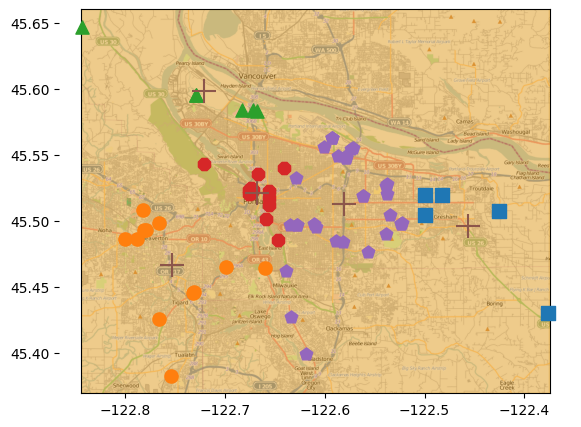

In [5]:
from numpy import *
import matplotlib.pyplot as plt

"""
函数说明：加载数据集
parameters:
    fileName -文件名
return:
    dataMat -数据列表
"""
def loadDataSet(fileName):      
    dataMat = []                
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float,curLine))  #将数据转换为float型数据
        dataMat.append(fltLine)
    return dataMat
"""
函数说明：计算向量欧氏距离
parameters:
    vecA -向量A
    vecB -向量B
return：
    欧氏距离
"""
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2)))  #此处也可以使用其他距离计算公式
"""
函数说明：为给定数据集构建一个包含k个随机质心的集合
parameters:
    dataSet -数据集
    k -质心个数
return：
    centroids -质心列表
"""
def randCent(dataSet, k):
    n = shape(dataSet)[1] 
    centroids = mat(zeros((k,n)))                   #创建存储质心的矩阵，初始化为0
    for j in range(n):                              #随机质心必须再整个数据集的边界之内
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ)    #通过找到数据集每一维的最小和最大值
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1)) #生成0到1之间的随机数，确保质心落在边界之内
    return centroids
"""
函数说明：K-均值算法
parameters:
    dataSet -数据集
    k -簇个数
    distMeas -距离计算函数
    createCent -创建初始质心函数
return：
    centroids -质心列表
    clusterAssment -簇分配结果矩阵
"""
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]                                #确定数据集中数据点的总数
    clusterAssment = mat(zeros((m,2)))                   #创建矩阵来存储每个点的簇分配结果 
    #第一列记录簇索引值，第二列存储误差
    centroids = createCent(dataSet, k)                   #创建初始质心
    clusterChanged = True                                #标志变量，若为True，则继续迭代
    while clusterChanged:
        clusterChanged = False 
        for i in range(m):                               #遍历所有数据找到距离每个点最近的质心
            minDist = inf; minIndex = -1    
            for j in range(k):                           #遍历所有质心
                distJI = distMeas(centroids[j,:],dataSet[i,:])              #计算质心与数据点之间的距离
                if distJI < minDist:    
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2    #将数据点分配到距其最近的簇，并保存距离平方和
        # print(centroids)
        for cent in range(k):                            #对每一个簇
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]   #得到该簇中所有点的值
            centroids[cent,:] = mean(ptsInClust, axis=0) #计算所有点的均值并更新为质心
    return centroids, clusterAssment 
"""
函数说明：绘图
parameters：
    centList -质心列表
    myNewAssments -簇列表
    dataMat -数据集
    k -簇个数
return:
    null
"""
def drawDataSet(dataMat,centList,myNewAssments,k):
    fig = plt.figure()      
    rect=[0.1,0.1,0.8,0.8]                                             #绘制矩形
    scatterMarkers=['s', 'o', '^', '8', 'p', 'd', 'v', 'h', '>', '<']  #构建标记形状的列表用于绘制散点图
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(k):                                                 #遍历每个簇
        ptsInCurrCluster = dataMat[nonzero(myNewAssments[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]          #使用索引来选择标记形状
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(centList[:,0].flatten().A[0], centList[:,1].flatten().A[0], marker='+', s=300)    #使用"+"来标记质心
    plt.show()
    
"""
函数说明：二分K-均值聚类算法
parameters:
    dataSet -数据集
    k -期望簇个数
    distMeas -距离计算函数
return：
    mat(centList) -质心列表矩阵
    clusterAssment -聚类结果
"""
def biKmeans(dataSet, k, distMeas=distEclud):
    m = shape(dataSet)[0]                                   #得到数据集中样本点的个数
    clusterAssment = mat(zeros((m,2)))                      #创建存储每个样本点的簇信息
    centroid0 = mean(dataSet, axis=0).tolist()[0]           #最初将所有的数据看作一个簇，计算其均值
    centList =[centroid0]                                   #创建质心列表
    for j in range(m):                                      #遍历所有数据
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2  #计算每个样本点与质点的距离
    while (len(centList) < k):                              #判断是否已经划分到用户指定的簇个数
        lowestSSE = inf                                     #将最小SSE设为无穷大
        for i in range(len(centList)):                      #遍历所有簇
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:]      #得到该簇所有数据的值
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)      #在给定的簇上面进行K-均值聚类（k=2）
            sseSplit = sum(splitClustAss[:,1])              #计算被划分的数据的误差
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1]) #计算剩余数据的误差
            print ("划分数据的误差, 未划分数据的误差: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:        #如果该划分的误差平方和（SSE）值最小
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit          #将本次划分结果保存
        bestClustAss[nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList)        #由于使用二分均值聚类，会得到两个编号分别为0和1的结果簇
        bestClustAss[nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit      #需要将这些簇编号更新为新加簇的编号
        print ('最佳划分簇为: ',bestCentToSplit)
        print ('最佳簇的长度为: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]                   #更新质心列表
        centList.append(bestNewCents[1,:].tolist()[0])                              #将新的质心添加至列表
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss    #更新新的簇分配结果
    return mat(centList), clusterAssment
"""
函数说明：地球表面两点之间的距离
parameters:
    vecA -向量A
    vecB -向量B
return:
    两个向量之间的球面距离
"""   
def distSLC(vecA, vecB):
    a = sin(vecA[0,1]*pi/180) * sin(vecB[0,1]*pi/180)   #使用球面余弦定理计算两点间的距离
    b = cos(vecA[0,1]*pi/180) * cos(vecB[0,1]*pi/180) * cos(pi * (vecB[0,0]-vecA[0,0]) /180)
    return arccos(a + b)*6371.0 
"""
函数说明：集成文本解析，聚类和画图
parameters:
    numClust -希望得到的簇个数
return:
    null
"""
def clusterClubs(numClust=5):
    datList = []
    for line in open('places.txt').readlines():                     #类似于loadDataSet函数
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])      #文件第4列和第5列分别对应经度和维度
    datMat = mat(datList)
    myCentroids, clustAssing = biKmeans(datMat, numClust, distMeas=distSLC)     #在数据集上进行二分均值聚类算法
    fig = plt.figure()      
    rect=[0.1,0.1,0.8,0.8]                                          #绘制矩形
    scatterMarkers=['s', 'o', '^', '8', 'p', 'd', 'v', 'h', '>', '<']  #构建标记形状的列表用于绘制散点图
    axprops = dict(xticks=[], yticks=[])    
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    imgP = plt.imread('Portland.png')
    ax0.imshow(imgP)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):                                       #遍历每个簇
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]       #使用索引来选择标记形状
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)    #使用"+"来标记质心
    plt.show()

if __name__ =='__main__':
    #对地图上的点进行聚类
    clusterClubs()

从图中我们可以看到，将数据集划分为了5个簇。我们可以尝试输入不同簇数目得到的程序运行结果，思考一下，簇的个数为多少会更好呢？

到此，我们学习了无监督学习中的聚类方法，k-均值聚类算法以及二分K-均值算法和其在真实数据上的应用。但这些算法并非仅有的聚类算法，接下来继续介绍其他的无监督学习算法。

## 【实验】sklearn实现Kmeans聚类算法 
sklearn.cluster库提供很多了聚类方法，本节我们介绍KMeans聚类算法。
![](1_kmeans_place.png)
主要参数说明：

    n_clusters: 整型，可选，默认为8。最终的簇个数也就是质心个数。
    init: 初始化质心的方法。可选{'k-means++','random'or ndarray}，默认为k-means++。
    k-means++: 用使算法可以快速收敛的方法为k均值聚类选择初始质心
    random: 随机选择
    ndarray：用户设定初始质心列表，形状为(n_clusters,n_features)
    tol: 浮点型，默认值为1e-4,即声明收敛时的相对误差
    random_state: 整型，RandomState实例或None，可选，默认值：None。如果是为整型值，则random_state是随机数生成器使用的种子数; 如果是RandomState实例，则random_state是随机数生成器; 如果没有，随机数生成器所使用的RandomState是np.random。

返回值：

    cluster_centers_:数组型数据，形状为(n_clusters,n_features)质心列表。
    labels_:每个点的标签
    inertia_:浮点型，每个点到其质心的距离平方和

函数:

fit(X[,y])  计算k-means聚类  
fit_predict(X[,y])  计算质心并预测每个数据点的簇标签  
get_params([deep])  得到评价器的参数  
predict(X)  为X数据集中的每个数据预测簇标签  
score(X[,y])    计算该聚类方法的正确率分数


接下来，我们使用sklearn库实现以下kMeans算法,并与我们上一节的k-均值聚类算法相比较。  
在当前工作目录下，添加如下代码：

In [5]:
from sklearn.cluster import KMeans
from numpy import *

"""
函数说明：加载数据集
parameters:
    fileName -文件名
return:
    dataMat -数据列表
"""
def loadDataSet(fileName):      
    dataMat = []                
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float,curLine))  #将数据转换为float型数据
        dataMat.append(fltLine)
    return dataMat
"""
函数说明：计算向量欧氏距离
parameters:
    vecA -向量A
    vecB -向量B
return：
    欧氏距离
"""
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2)))  #此处也可以使用其他距离计算公式
"""
函数说明：为给定数据集构建一个包含k个随机质心的集合
parameters:
    dataSet -数据集
    k -质心个数
return：
    centroids -质心列表
"""
def randCent(dataSet, k):
    n = shape(dataSet)[1] 
    centroids = mat(zeros((k,n)))                   #创建存储质心的矩阵，初始化为0
    for j in range(n):                              #随机质心必须再整个数据集的边界之内
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ)    #通过找到数据集每一维的最小和最大值
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1)) #生成0到1之间的随机数，确保质心落在边界之内
    return centroids
"""
函数说明：K-均值算法
parameters:
    dataSet -数据集
    k -簇个数
    distMeas -距离计算函数
    createCent -创建初始质心函数
return：
    centroids -质心列表
    clusterAssment -簇分配结果矩阵
"""
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]                                #确定数据集中数据点的总数
    clusterAssment = mat(zeros((m,2)))                   #创建矩阵来存储每个点的簇分配结果 
    #第一列记录簇索引值，第二列存储误差
    centroids = createCent(dataSet, k)                   #创建初始质心
    clusterChanged = True                                #标志变量，若为True，则继续迭代
    while clusterChanged:
        clusterChanged = False 
        for i in range(m):                               #遍历所有数据找到距离每个点最近的质心
            minDist = inf; minIndex = -1    
            for j in range(k):                           #遍历所有质心
                distJI = distMeas(centroids[j,:],dataSet[i,:])              #计算质心与数据点之间的距离
                if distJI < minDist:    
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2    #将数据点分配到距其最近的簇，并保存距离平方和
        print(centroids)    
        for cent in range(k):                            #对每一个簇
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]   #得到该簇中所有点的值
            centroids[cent,:] = mean(ptsInClust, axis=0) #计算所有点的均值并更新为质心
    return centroids, clusterAssment 

X=loadDataSet('testSet.txt')
kmeans = KMeans(n_clusters=4,random_state=0,algorithm="elkan").fit(X)
print("sklearn实现质心列表为：",kmeans.cluster_centers_)

centroids, _ = kMeans(mat(X),4)
print("python实现质心列表为：",centroids)

sklearn实现质心列表为： [[ 2.6265299   3.10868015]
 [-3.38237045 -2.9473363 ]
 [ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]]
[[-1.47438488 -0.39861324]
 [-1.83791303  4.05625048]
 [-0.62314809  4.1405313 ]
 [-4.17317784  3.68968844]]
[[-0.3479952  -2.75102193]
 [-2.0556455   3.002598  ]
 [ 2.31553173  3.07737886]
 [-3.48664243  2.77252571]]
[[-0.54735726 -2.93692713]
 [-1.84544625  2.96289267]
 [ 2.80642645  2.73635527]
 [-3.3856885   2.52409988]]
[[-0.68321373 -2.968607  ]
 [-1.76693827  2.96643864]
 [ 2.87916148  2.54065409]
 [-3.31050467  2.56852067]]
[[-0.68321373 -2.968607  ]
 [-1.692266    2.9988663 ]
 [ 2.87916148  2.54065409]
 [-3.2308203   2.5758848 ]]
[[-0.68321373 -2.968607  ]
 [-1.595569    3.01158056]
 [ 2.87916148  2.54065409]
 [-3.17006745  2.60393509]]
python实现质心列表为： [[-0.68321373 -2.968607  ]
 [-1.595569    3.01158056]
 [ 2.87916148  2.54065409]
 [-3.17006745  2.60393509]]


## 实验总结

本节我们介绍了K均值聚类算法，并实现了二分K-均值聚类算法，您应该能达到以下两个目标：

1. 掌握K均值聚类算法。

2. 学会使用sklearn实现相应算法。

## 参考文献与延伸阅读

### 参考资料:

1.哈林顿，李锐. 机器学习实战 : Machine learning in action[M]. 人民邮电出版社, 2013.  
2.周志华. 机器学习:Machine learning[M]. 清华大学出版社, 2016.

### 延伸阅读

1.李航. 统计学习方法[M]. 清华大学出版社, 2012.